Лабораторная работа 2.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import linregress

In [2]:
a = 0
b = 0.5

In [3]:
def f(x):
    return x ** 5 - 2.9 * x ** 3 + 6.5 * x ** 2 - 7 * x 

In [4]:
exact_value = quad(f, 0, 0.5)[0] #Точное значение интеграла

Метод левых прямоугольников для вычисления значения определённого интеграла

In [5]:
def left_rectangle_integral(f, a, b, n, sum=None):
    '''
    Функция реализует метод левых прямоугольников
    
    f: подынтегральная функция
    a: нижний предел интегрирования
    b: верхний предел интегрирования
    n: количество разбиений
    f_dict: словарь для хранения значений функции в точках разбиения, 
    для того чтобы избегать повторных вычислений на итерациях

    Функция возвращает приближенное значение интеграла
    '''
    h = (b - a) / n
    if sum is None:
        integral = 0
        for i in range(n):
            x_i = a + i * h
            integral += f(x_i)
    else:
        integral = sum
        for i in range(1, n, 2):
            x_i = a + i * h
            integral += f(x_i)
    integral *= h
    return integral, integral / h

Применение правила Рунге

In [6]:
def runge_rule_integral(f, a, b, eps):
    """
    Вычисляет приближенное значение интеграла с заданной точностью с помощью метода левых прямоугольников.
    Оценка точности производится с помощью правила Рунге.

    f: подынтегральная функция
    a: нижний предел интегрирования
    b: верхний предел интегрирования
    eps: требуемая точность
    
    Функция возвращает список с приближенным значением интеграла и количеством итераций.
    """
    iterations = 0
    n = 5 # Начальное количество разбиений

    integral_n, sum_n = left_rectangle_integral(f, a, b, n)
    integral_2n, sum_2n = left_rectangle_integral(f, a, b, 2 * n, sum_n)
    
    # Пока разница между приближенными значениями определённого интеграла на соседних шагах больше заданной точности (правило Рунге).
    while abs(integral_2n - integral_n) > eps:
        n *= 2
        integral_n = integral_2n
        sum_n = sum_2n
        integral_2n, sum_2n = left_rectangle_integral(f, a, b,  2 * n, sum_n)
        iterations += 1
    
    return np.array([integral_2n,  iterations])


Выполнение обязательных исследований

In [7]:
eps_list = np.array([0.1 ** i for i in range(1, 8)])
integral_and_iterations = [runge_rule_integral(f, a, b, i) for i in eps_list]

KeyboardInterrupt: 

In [ ]:
error_list1 = [abs(exact_value - integral_and_iterations[i][0]) for i in range(len(integral_and_iterations))]
iterations = [integral_and_iterations[i][1] for i in range(len(integral_and_iterations))]

In [ ]:
h_list = []
error_list2 = []
f_dict = {}

In [ ]:
for k in range(1, 21):
    n = 2 ** k  
    h = (b - a) / n  
    approx_value, sum = left_rectangle_integral(f, a, b, n)  
    error = abs(approx_value - exact_value)  
    h_list.append(h)
    error_list2.append(error)

In [ ]:
title_list = ['Зависимость фактической ошибки от заданной точности', 'Зависимость числа итераций от заданной точности', 'Зависимость фактической ошибки от длины отрезка разбиения']
xlabel_list = ['Заданная точность', 'Заданная точность', 'Длина отрезка разбиения']
ylabel_list = ['Фактическая ошибка', 'Количество итераций', 'Фактическая ошибка']

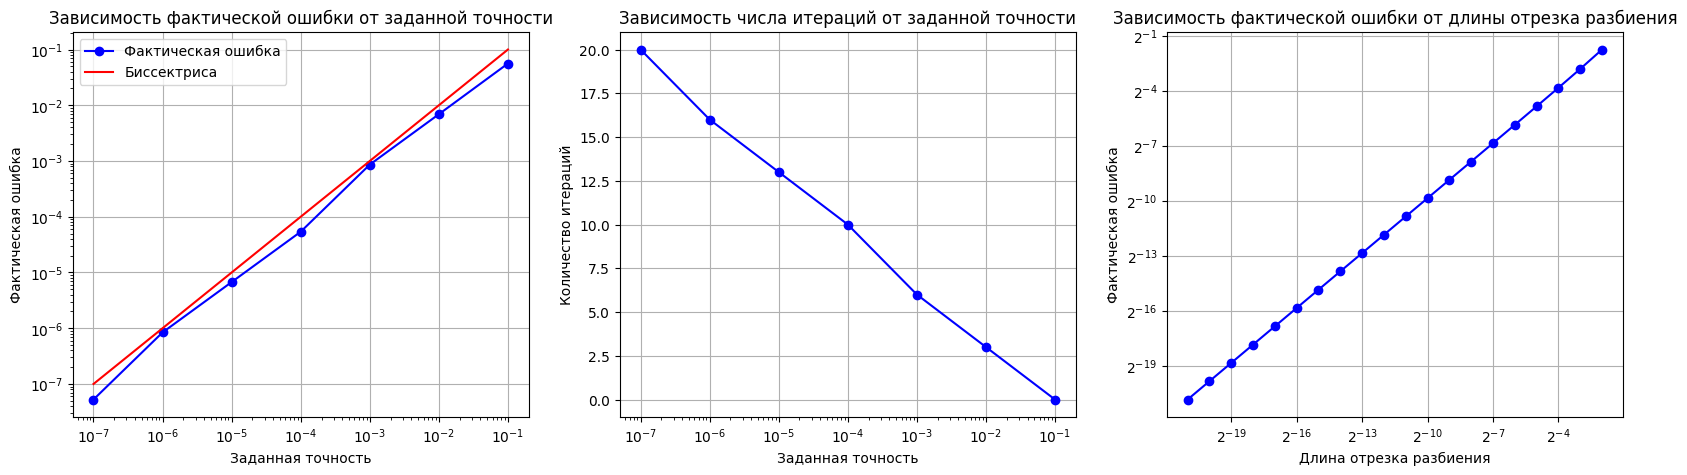

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].loglog(eps_list, error_list1, color='blue', label='Фактическая ошибка', marker='o')
ax[0].loglog(eps_list, eps_list, color='red', label='Биссектриса')
ax[0].legend()

ax[1].semilogx(eps_list, iterations, color='blue', marker='o')

ax[2].loglog(h_list, error_list2, base = 2, color='blue', marker='o')

for i in range(3):
    ax[i].grid()
    ax[i].set_title(title_list[i])
    ax[i].set_xlabel(xlabel_list[i])
    ax[i].set_ylabel(ylabel_list[i])


In [ ]:
log_h = np.log2(h_list)
log_error = np.log2(error_list2)
slope, intercept, r_value, p_value, std_err = linregress(log_h, log_error)
slope, 2 ** intercept

(np.float64(1.0031270022628946), np.float64(1.1406200662932082))

ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ. Адаптивный метод на основе метода левых прямоугольников

In [ ]:
def adaptive_integration(f, a, b, eps, max_depth=1000, depth=0, sum_total=None):
    '''
    Вычисляет приближенное значение определённого интеграла с помощью адаптивного метода, построенного на базе метода левых прямоугольников.
    
    f - подынтегральная функция
    a и b - нижний и верхний пределы интегрирования
    eps - требуемая точность
    max_depth - максимальная глубина рекурсии
    depth - текущая глубина рекурсии
    sum_total - сумма значений функции на прошлом шаге (если есть)
    '''
    
    depth += 1
    eps = eps / 2

    # Если достигнута максимальная глубина рекурсии, возвращаем приближенное значение
    if depth > max_depth:
        print("Достигнута максимальная глубина рекурсии")
        return left_rectangle_integral(f, a, b, 1)[0]
    
    # Оценка интеграла на всём промежутке
    integral_total = left_rectangle_integral(f, a, b, 1, sum_total)[0]
    
    # Разделение отрезка пополам
    mid = (a + b) / 2
    
    # Оценка интеграла на каждой половине
    integral_left, sum_left = left_rectangle_integral(f, a, mid, 1)
    integral_right, sum_right = left_rectangle_integral(f, mid, b, 1)
    
    # Оценка ошибки
    error = abs(integral_total - (integral_left + integral_right))
    
    # Если ошибка меньше точности, возвращаем сумму
    if error < eps:
        return integral_left + integral_right
    else:
        # Рекурсивно применяем метод к каждой половине
        return adaptive_integration(f, a, mid, eps, max_depth, depth, sum_left) + \
               adaptive_integration(f, mid, b, eps, max_depth, depth, sum_right)

Построение графиков для дополнительного исследования

In [ ]:
def left_rectangle_integral(f, a, b, n, f_dict):
    integral = 0
    h = (b - a) / n
    many_x = np.linspace(a, b - h, n)
    for i in many_x:
        if i not in f_dict.keys():
            f_dict[i] = f(i)
        integral += f_dict[i]
    integral *= h
    return integral, h  # Возвращаем также длину шага

In [ ]:

def adaptive_integration(f, a, b, eps, f_dict, step_sizes, max_depth=20, depth=0):
    if depth > max_depth:
        print("Достигнута максимальная глубина рекурсии")
        integral, h = left_rectangle_integral(f, a, b, 1, f_dict)
        step_sizes.append(h)  # Сохраняем длину шага
        return integral
    
    # Оценка интеграла на всем отрезке
    integral_total = left_rectangle_integral(f, a, b, 1, f_dict)[0]
    
    # Разделение отрезка пополам
    mid = (a + b) / 2
    
    # Оценка интеграла на каждой половине
    integral_left, h_left = left_rectangle_integral(f, a, mid, 1, f_dict)
    integral_right, h_right = left_rectangle_integral(f, mid, b, 1, f_dict)
    
    # Оценка ошибки
    error = abs(integral_total - (integral_left + integral_right))
    
    # Сохраняем длины шагов
    #step_sizes.append(h_total)
    step_sizes.append(h_left)
    step_sizes.append(h_right)
    
    # Если ошибка меньше точности, возвращаем сумму
    if error < eps:
        return integral_left + integral_right
    else:
        # Рекурсивно применяем метод к каждой половине
        return adaptive_integration(f, a, mid, eps, f_dict, step_sizes, max_depth, depth + 1) + \
               adaptive_integration(f, mid, b, eps, f_dict, step_sizes, max_depth, depth + 1)

In [ ]:
def analyze_step_sizes(f, a, b, eps_list):
    step_sizes_dict = {}
    min_step_sizes = []
    
    for eps in eps_list:
        f_dict = {}
        step_sizes = []
        adaptive_integration(f, a, b, eps, f_dict, step_sizes)
        step_sizes_dict[eps] = step_sizes
        min_step_sizes.append(min(step_sizes))
    
    return step_sizes_dict, min_step_sizes

In [ ]:
step_sizes_dict, min_step_sizes = analyze_step_sizes(f, a, b, eps_list)
mean_step_sizes = [np.mean(step_sizes_dict[eps]) for eps in eps_list]

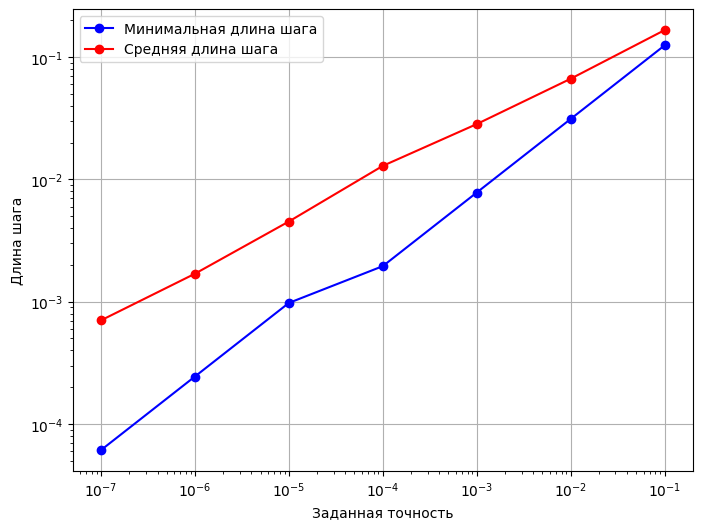

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.loglog(eps_list, min_step_sizes, marker='o', label='Минимальная длина шага', color='blue')
ax.loglog(eps_list, mean_step_sizes, marker='o',label='Средняя длина шага', color='red')
ax.set_xlabel('Заданная точность')
ax.set_ylabel('Длина шага')
ax.grid()
ax.legend()

In [ ]:
def adaptive_integration(f, a, b, eps, f_dict, step_info, max_depth=20, depth=0):
    if depth > max_depth:
        print("Достигнута максимальная глубина рекурсии")
        integral, h = left_rectangle_integral(f, a, b, 1, f_dict)
        return integral
    
    # Оценка интеграла на всем отрезке
    integral_total, h_total = left_rectangle_integral(f, a, b, 1, f_dict)
    
    # Разделение отрезка пополам
    mid = (a + b) / 2
    
    # Оценка интеграла на каждой половине
    integral_left, h_left = left_rectangle_integral(f, a, mid, 1, f_dict)
    integral_right, h_right = left_rectangle_integral(f, mid, b, 1, f_dict)
    
    # Оценка ошибки
    error = abs(integral_total - (integral_left + integral_right))
    
    # Сохраняем координаты x и длины шагов
    step_info.append((a, h_total))
    step_info.append((mid, h_left))
    step_info.append((mid, h_right))
    
    # Если ошибка меньше точности, возвращаем сумму
    if error < eps:
        return integral_left + integral_right
    else:
        # Рекурсивно применяем метод к каждой половине
        return adaptive_integration(f, a, mid, eps, f_dict, step_info, max_depth, depth + 1) + \
               adaptive_integration(f, mid, b, eps, f_dict, step_info, max_depth, depth + 1)

In [ ]:
# Функция для анализа зависимости длины шага от координаты x
def analyze_step_sizes(f, a, b, eps):
    f_dict = {}
    step_info = []  # Список для хранения пар (x, h)
    adaptive_integration(f, a, b, eps, f_dict, step_info)
    return step_info

In [ ]:
step_info = analyze_step_sizes(f, 0, 2, 1e-1)

x = [info[0] for info in step_info]
step_sizes = [info[1] for info in step_info]

In [ ]:
min_x_and_y = {}

for x, y in zip(x, step_sizes):
    if x in min_x_and_y:
        if y < min_x_and_y[x]:
            min_x_and_y[x] = y
    else:
        min_x_and_y[x] = y

x = list(min_x_and_y.keys())
y = list(min_x_and_y.values())

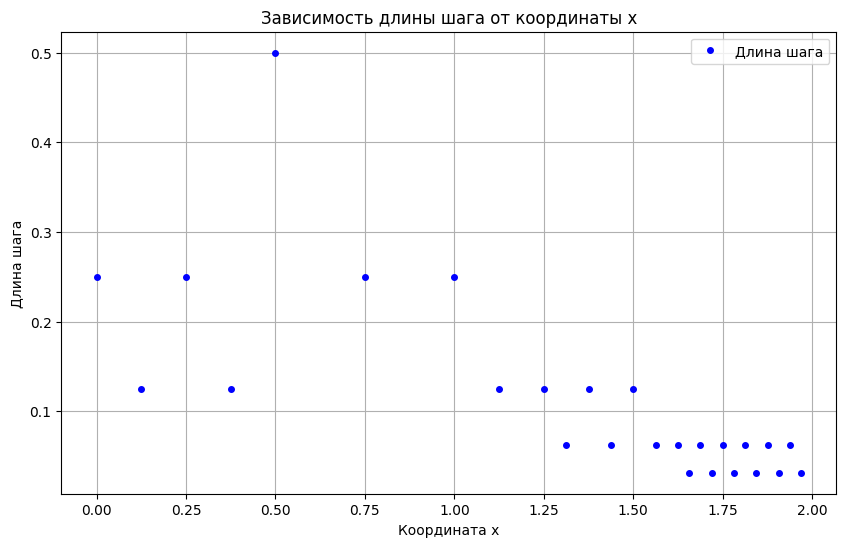

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=4, label='Длина шага', color='blue')
plt.xlabel('Координата x')
plt.ylabel('Длина шага')
plt.title('Зависимость длины шага от координаты x')
plt.legend()
plt.grid(True)
plt.show()